## Traffic sign recognition using [this](https://data-flair.training/blogs/python-project-traffic-signs-recognition/?fbclid=IwAR2K0szafodugcgb-xGWweWyUR415uVDN3e9OXaSBoOBmfoIGsaWTdNx5GM) link 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
%config IPCompleter.greedy=True

In [11]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_path = os.path.join(cur_path, '..', 'Datasets', 'gtsrb-german-traffic-sign')

for i in range(classes):
    path = os.path.join(data_path, 'train', str(i))
    images = os.listdir(path)
    
    for a in images: 
        try:
#             print(path + '/' + a)
            image = Image.open(path + '/' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("error loading image")
            break
            
data = np.array(data)
labels = np.array(labels)

In [13]:
print(data.shape, labels.shape)
xTrain, xTest, yTrain, yTest = train_test_split(data, labels, test_size=0.2, random_state=42)

print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

yTrain = to_categorical(yTrain, 43)
yTest = to_categorical(yTest, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=xTrain.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
epochs = 15
history = model.fit(xTrain, yTrain, batch_size=64, epochs=epochs, validation_data=(xTest, yTest))


Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 19s 604us/step - loss: 2.4626 - accuracy: 0.3801 - val_loss: 0.8623 - val_accuracy: 0.7860
Epoch 2/15
31367/31367 [==============================] - 5s 172us/step - loss: 0.8982 - accuracy: 0.7321 - val_loss: 0.3522 - val_accuracy: 0.9073
Epoch 3/15
31367/31367 [==============================] - 5s 173us/step - loss: 0.6125 - accuracy: 0.8170 - val_loss: 0.2346 - val_accuracy: 0.9333
Epoch 4/15
31367/31367 [==============================] - 5s 172us/step - loss: 0.4692 - accuracy: 0.8569 - val_loss: 0.1733 - val_accuracy: 0.9526
Epoch 5/15
31367/31367 [==============================] - 5s 171us/step - loss: 0.3694 - accuracy: 0.8893 - val_loss: 0.1486 - val_accuracy: 0.9620
Epoch 6/15
31367/31367 [==============================] - 5s 174us/step - loss: 0.3323 - accuracy: 0.9002 - val_loss: 0.1371 - val_accuracy: 0.9619
Epoch 7/15
31367/31367 [==============================] - 5s 

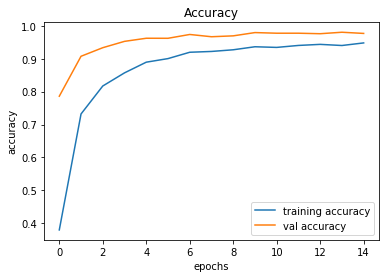

In [17]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

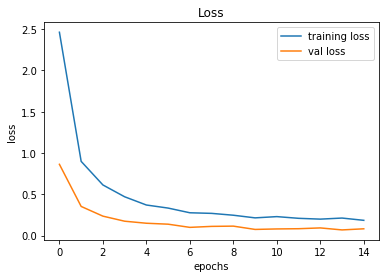

In [18]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [19]:
from sklearn.metrics import accuracy_score
import pandas as pd

In [23]:
yTest = pd.read_csv(data_path+'/Test.csv')
labels = yTest["ClassId"].values
imgs = yTest["Path"].values

data = []

for img in imgs:
    image = Image.open(data_path + '/' + img)
    image = image.resize((30, 30))
    data.append(np.array(image))
    
xTest = np.array(data)

pred = model.predict_classes(xTest)
accuracy_score(labels, pred)

0.9346793349168646

In [ ]:
model.save('traffic_sign_classifier.h5')